# Розпізнавання цифр MNIST
1. Завантаження набору даних MNIST із TensorFlow
2. Передобробка даних
3. Визначення архітектури нейронної мережі прямого поширення (feedforward)
4. Навчання моделі
5. Тестування та метрики (матриця помилок, accuracy, precision, recall, F1)
6. Функція розпізнавання власноручно написаних цифр

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, classification_report
from PIL import Image, ImageOps
import seaborn as sns

## 1. Завантаження набору даних MNIST із TensorFlow

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print('Train samples:', x_train.shape, 'Test samples:', x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Train samples: (60000, 28, 28) Test samples: (10000, 28, 28)


## 2. Передобробка даних

In [30]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape(-1, 784) 
x_test = x_test.reshape(-1, 784) 

num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

print('x_train shape:', x_train.shape)
print('y_train shape:', y_train_cat.shape)

x_train shape: (60000, 784)
y_train shape: (60000, 10)


## 3. Визначення архітектури нейронної мережі прямого поширення (feedforward)

In [31]:
input_shape = (28, 28, 1)
model = models.Sequential([ 
 layers.Input(shape=(784,)), 
 layers.Dense(128, activation="relu"), 
 layers.Dense(64, activation="relu"), 
 layers.Dense(10, activation="softmax") 
]) 


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Навчання моделі

In [32]:
epochs = 12
batch_size = 128
history = model.fit(
    x_train, y_train_cat,
    validation_split=0.1,
    epochs=epochs,
    batch_size=batch_size,
    verbose=2
)

Epoch 1/12
422/422 - 4s - 10ms/step - accuracy: 0.5921 - loss: 1.3881 - val_accuracy: 0.8233 - val_loss: 0.6755
Epoch 2/12
422/422 - 2s - 5ms/step - accuracy: 0.8343 - loss: 0.5790 - val_accuracy: 0.8917 - val_loss: 0.4011
Epoch 3/12
422/422 - 2s - 5ms/step - accuracy: 0.8783 - loss: 0.4260 - val_accuracy: 0.9087 - val_loss: 0.3319
Epoch 4/12
422/422 - 2s - 5ms/step - accuracy: 0.8923 - loss: 0.3714 - val_accuracy: 0.9120 - val_loss: 0.3006
Epoch 5/12
422/422 - 2s - 5ms/step - accuracy: 0.8997 - loss: 0.3444 - val_accuracy: 0.9245 - val_loss: 0.2740
Epoch 6/12
422/422 - 2s - 5ms/step - accuracy: 0.9064 - loss: 0.3246 - val_accuracy: 0.9282 - val_loss: 0.2625
Epoch 7/12
422/422 - 2s - 5ms/step - accuracy: 0.9118 - loss: 0.3088 - val_accuracy: 0.9293 - val_loss: 0.2506
Epoch 8/12
422/422 - 2s - 5ms/step - accuracy: 0.9149 - loss: 0.2949 - val_accuracy: 0.9335 - val_loss: 0.2353
Epoch 9/12
422/422 - 2s - 5ms/step - accuracy: 0.9187 - loss: 0.2821 - val_accuracy: 0.9363 - val_loss: 0.2234


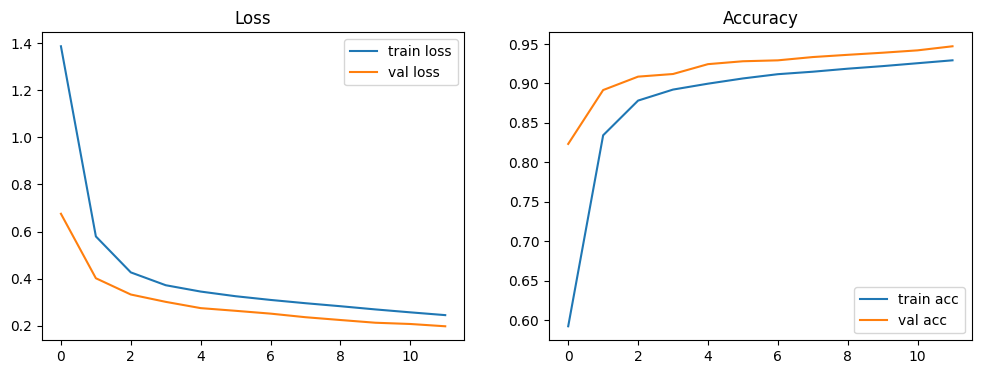

In [33]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

## 5. Тестування та метрики (матриця помилок, accuracy, precision, recall, F1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy (test): 0.9322
Precision (macro): 0.9317
Recall (macro):    0.9310
F1-score (macro):  0.9312

Classification report:

              precision    recall  f1-score   support

           0     0.9586    0.9684    0.9635       980
           1     0.9686    0.9780    0.9733      1135
           2     0.9267    0.9312    0.9290      1032
           3     0.8899    0.9366    0.9127      1010
           4     0.9343    0.9420    0.9381       982
           5     0.9194    0.8700    0.8940       892
           6     0.9400    0.9489    0.9444       958
           7     0.9419    0.9309    0.9364      1028
           8     0.9063    0.8943    0.9003       974
           9     0.9310    0.9098    0.9203      1009

    accuracy                         0.9322     10000
   macro avg     0.9317    0.9310    0.9312     10000
weighted avg     0.9323    0.9322    0.9321     10000



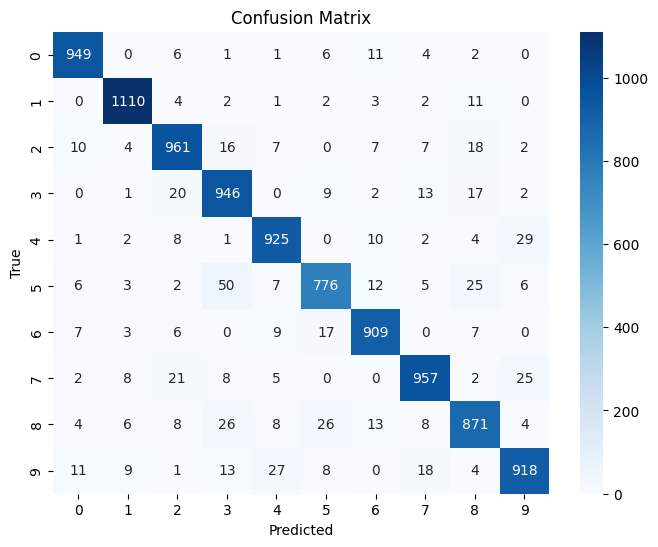

In [34]:
y_pred_proba = model.predict(x_test)
y_pred = np.argmax(y_pred_proba, axis=1)

acc = accuracy_score(y_test, y_pred)
print(f'Accuracy (test): {acc:.4f}')

prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
print(f'Precision (macro): {prec:.4f}')
print(f'Recall (macro):    {rec:.4f}')
print(f'F1-score (macro):  {f1:.4f}')

print('\nClassification report:\n')
print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## 6. Функція розпізнавання власноручно написаних цифр

In [41]:
def preprocess_for_mnist(img_input):
    if isinstance(img_input, str):
        img = Image.open(img_input)
    elif isinstance(img_input, Image.Image):
        img = img_input
    else:
        raise ValueError("img_input does not contain an image")

    # Переводим в оттенки серого
    img = img.convert("L")

    # Проверяем фон: если цифра чёрная на белом → инвертируем
    np_img = np.array(img)
    mean_val = np.mean(np_img)
    if mean_val > 128:
        img = ImageOps.invert(img)

    # Изменение размера до 28x28
    img = img.resize((28, 28), Image.Resampling.LANCZOS)

    # Нормализация и преобразование в вектор (784 признака)
    arr = np.array(img).astype("float32") / 255.0
    arr = arr.reshape(1, 784)
    return arr


def recognize_handwritten(img_input, model_local=None, show_image=True):
    if model_local is None:
        mdl = model
    else:
        mdl = model_local

    arr = preprocess_for_mnist(img_input)
    preds = mdl.predict(arr)
    pred_class = int(np.argmax(preds, axis=1)[0])
    pred_prob = float(np.max(preds))

    if show_image:
        plt.figure(figsize=(3, 3))
        plt.imshow(arr.reshape(28, 28), cmap="gray")
        plt.title(f"Pred: {pred_class} (p={pred_prob:.3f})")
        plt.axis("off")
        plt.show()

    return {"pred": pred_class, "prob": pred_prob, "probs": preds[0]}

result = recognize_handwritten('../input/images/8.png')
print(result)